<a href="https://colab.research.google.com/github/Faseela782/resume_screening_NLP/blob/main/Resume_screening_with_NLP_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/resumedataset/Updatedresumedataset (2).csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
#1.Exploratory Data Analysis(EDA)

In [ ]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Data Science,40
8,Mechanical Engineer,40
9,Sales,40


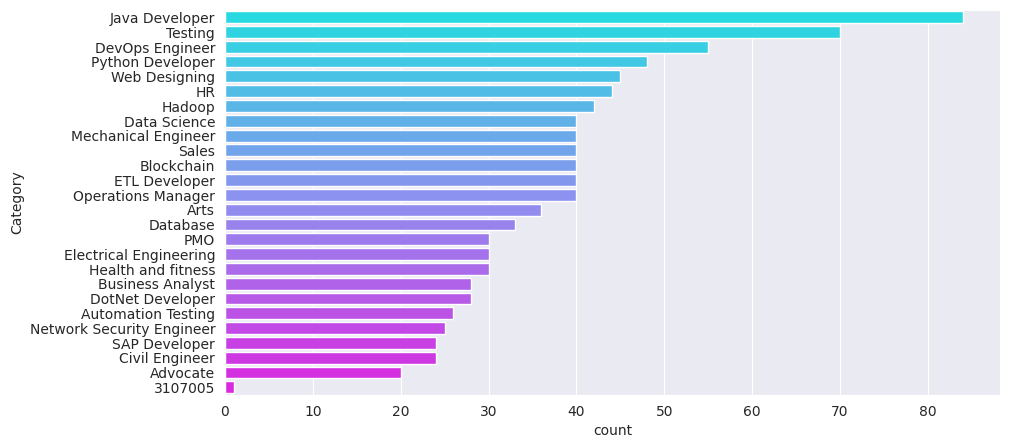

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=category['count'],y=category['Category'],palette='cool')
plt.show()

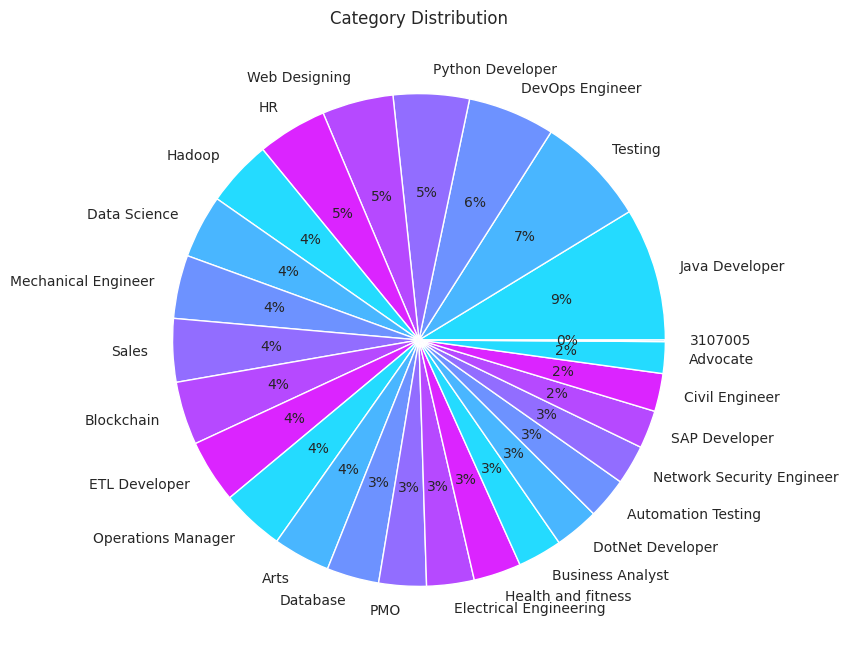

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(category['count'],labels=category['Category'],colors=sns.color_palette('cool'),autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [ ]:
#Data pre-processing

#1.Data Cleaning

In [ ]:
def cleanResume(resumeText):
  resumeText=re.sub('http\S+\s',' ',resumeText)#remove URLs
  resumeText=re.sub('RT|cc',' ',resumeText)#remove RT and cc
  resumeText=re.sub('#\S+',' ',resumeText)#remove hashtags
  resumeText=re.sub('@\S+',' ',resumeText)#remove mentions
  resumeText=re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',resumeText)#remove punctuations
  resumeText=re.sub('\s+',' ',resumeText)#remove extra whitespaces
  resumeText=re.sub(r'[^\x00-\x7f]','',resumeText)#remove non-ASCII characters
  return resumeText

In [ ]:
df.isnull().sum()

,0
Category,0
Resume,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['cleaned']=df['Resume'].apply(lambda x:cleanResume(x))
df.head(5)

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
#getting the entire resume text
corpus=''
for i in range(0,len(df)):
  corpus=corpus+df['cleaned'][i]

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import wordcloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

400614

In [ ]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
#Looping through the tokensand make them lower case
for word in tokens:
  words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [ ]:
#Now encode the data
label = LabelEncoder()
df['new_category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

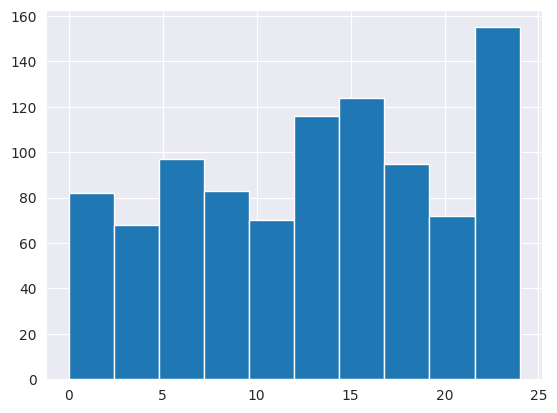

In [ ]:
plt.hist(df['new_category'])

In [ ]:
!pip install -U scikit-learn

In [ ]:
#Vectorizing the cleaned columns
from sklearn.feature_extraction.text import TfidfVectorizer
text=df['cleaned'].values
target =df['new_category'].values
word_vectorizer =TfidfVectorizer (
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)


In [ ]:
WordFeatures.shape

(962, 1500)

3.Train Test data and Modelling

In [ ]:
#Seperate train and test data
x_train,x_test,y_train,y_test=train_test_split(WordFeatures,target,random_state=24,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [ ]:
#Model training
model=OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
print(f'------------------/n|Training Accuracy   : {model.score(x_train,y_train)}')
print(f'------------------/n|Testing Accuracy    : {model.score(x_test,y_test)}')

------------------/n|Training Accuracy   : 0.9895968790637191
------------------/n|Testing Accuracy    : 0.9689119170984456


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.90      1.00      0.95         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.57      0.73         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

4.To learn the top keywords to analyze

In [ ]:
#Stop words are generally the most common words in a language.
#English stop  words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new=[]
#Now we need to remove stop words from the words variable
#Appending to words new  all words that are in words but not in sw
for word in words:
  if word not in stopwords:
    words_new.append(word)

In [ ]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Perform Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()
lem_words=[]
for word in words_new:
  word=wn.lemmatize(word)
  lem_words.append(word)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [ ]:
same=0
diff=0
for i in range(0,1832):
  if(lem_words[i==words_new[i]]):
    same=same+1
  elif(lem_words[i!=words_new[i]]):
    diff=diff+1
print('Number of words Lemmatizes=',diff)
print('Number of words not Lemmatized=',same)

Number of words Lemmatizes= 0
Number of words not Lemmatized= 1832


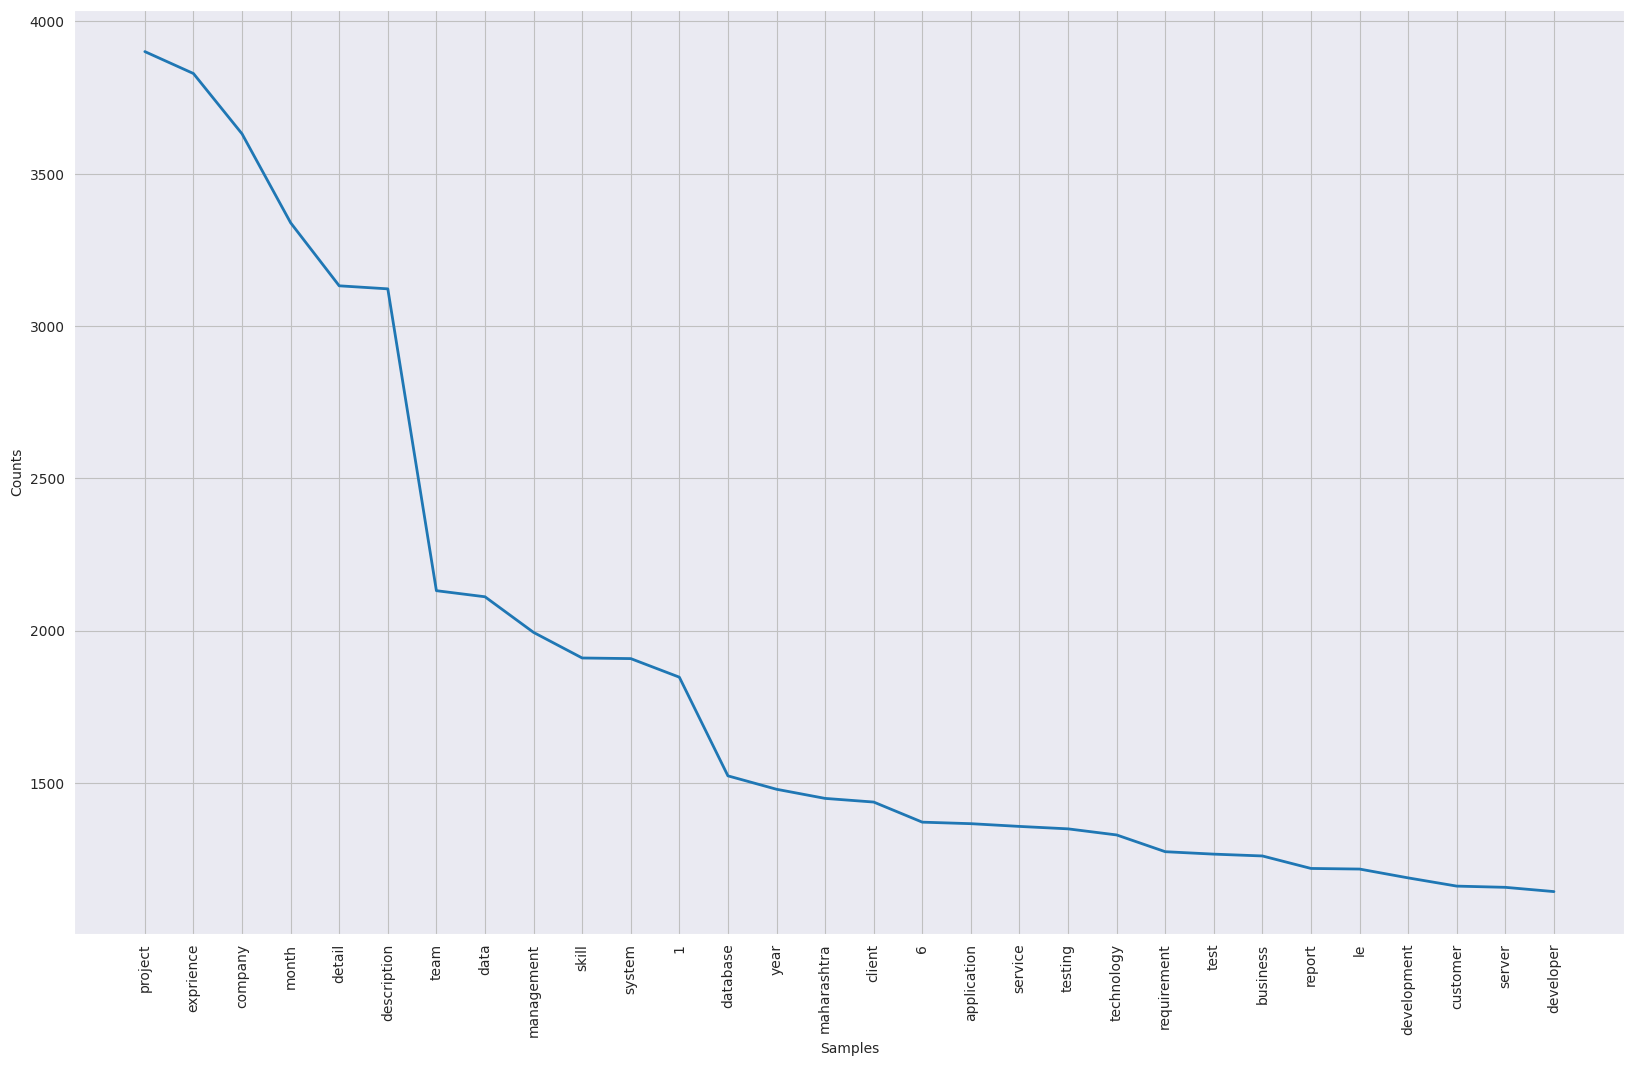

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
#The frequency distribution pf the words
freq_dist=nltk.FreqDist(lem_words)
#Frequency Distribution plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [ ]:
#Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])

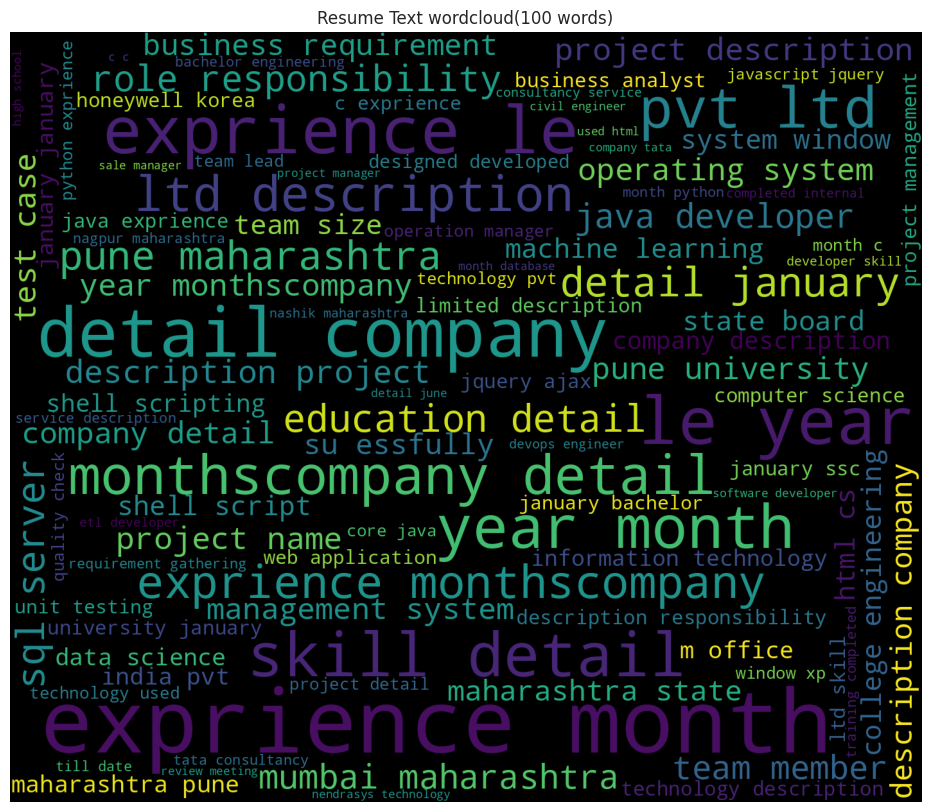

In [ ]:
plt.subplots(figsize=(16,10))
from wordcloud import WordCloud
wordcloud  = WordCloud(
background_color='black',
max_words=100,
width=1420,
height=1200
).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text wordcloud(100 words)')
plt.axis('off')
plt.show()


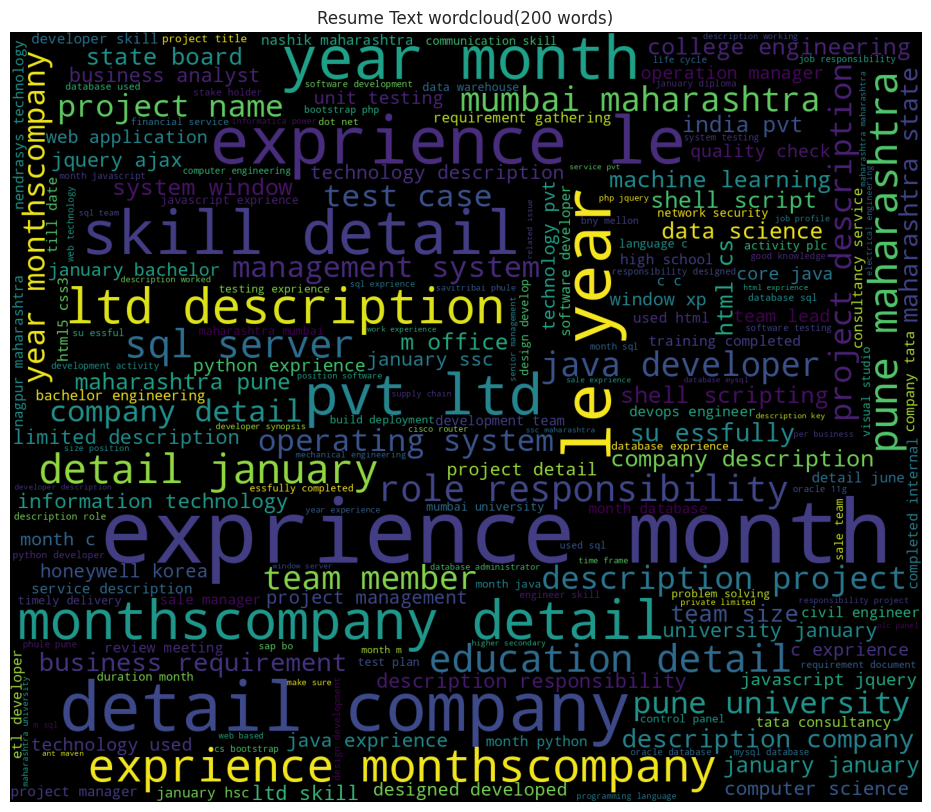

In [ ]:
plt.subplots(figsize=(16,10))
wordcloud=WordCloud(
    background_color='black',
    max_words=200,
    width=1420,
    height=1200
).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text wordcloud(200 words)')
plt.axis('off')
plt.show()

